### Метод опорных векторов

Метод опорных векторов ( Support Vector Machine, SVM) – это мощный алогритм машинного обучения, способный выполнять линейную или нелинейную классификацию, регрессию и даже выявление выбросов.

В Sklearn метод опорных векторов реализован в модуле svm: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

***Какая из прямых разделяет классы лучше?***

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Classifier.svg/220px-Classifier.svg.png)

Основная идея метода опорных векторов заключается в поиске **границы решения** – гиперплоскости, разделяющей объекты на два множества, таким образом, чтобы расстояние между границей решения и самыми близкими к ней обучающими объектами (**опорными векторами**) была максимальной. 
Две параллельных гиперплоскости строятся по обеим сторонам границы решения. Алгоритм работает в предположении, что чем больше расстояние между гиперплоскостями, тем меньше будет средняя ошибка классификатора, поэтому метод также называют методом классификации с максимальным зазором.

![img](https://habrastorage.org/webt/5s/g-/k9/5sg-k9ytduiqgxlsv66u6jprvsi.png)

![img](https://habrastorage.org/storage/habraeffect/41/27/41273d1e28d6b6c0b7c9a42eac2be771.png)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # Импортируем класс

Документация к SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [27]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

In [28]:
y = [0, 1, 0, 1, 0, 1]

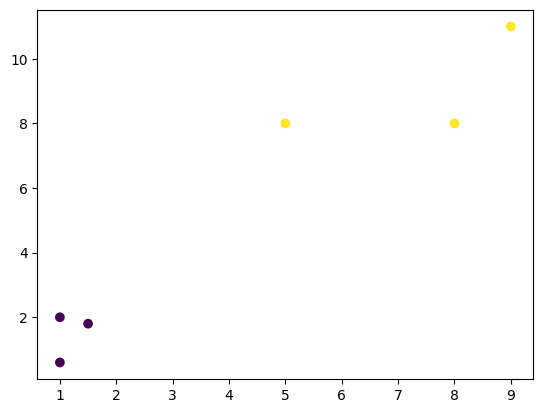

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [30]:
clf = SVC(kernel='linear') # Создаем экземпляр класса
clf.fit(X,y) # Обучаем

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


[0.1380943  0.24462418]


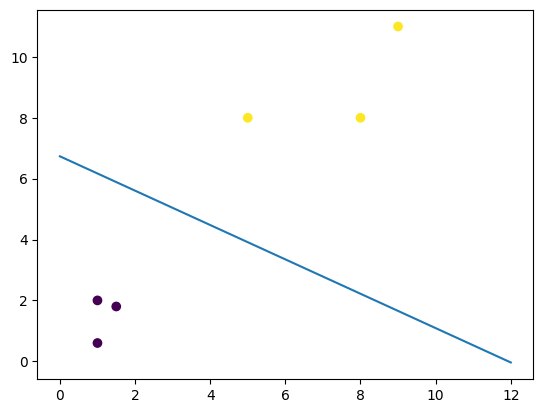

In [31]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

<a href="https://ibb.co/pxvfjgm"><img src="https://i.ibb.co/L8zxdMG/3.jpg" alt="3" border="0"></a>

### Классификация с мягким зазором (soft-margin SVM)

Цель заключается в том, чтобы отыскать хороший баланс между удержанием полосы как можно более широкой и ограничением количества нарушений зазора (т.е. появления экземпляров, которые оказываются посредине полосы или даже на неправильной стороне).

![img](https://storage.guidotti.dev/course/text-mining-unimi-2019-2020/assets/svm-3.png)

В классах SVM библиотеки Scikit-Learn вы можете управлять упомянутым балансом, используя гиперпараметр C: меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора.

![img](https://www.bogotobogo.com/python/scikit-learn/images/svm/bias-variance-trade-off-svm.png)

### Решение нелинейных задач ядерным методом SVM

Ключевая идея в основе ядерных методов остоит в том, чтобы спроецировать данные на пространство 
более высокой размерности, где они становятся линейно разделимыми.   
Как показано на нижеследующем рисунке, мы можем трансформировать двумерный набор данных в новое трехмерное пространство признаков, где классы становятся разделимыми.

![img](https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png)

![img](https://najeesmith.github.io/images/Classifiers/SVM/model.png)

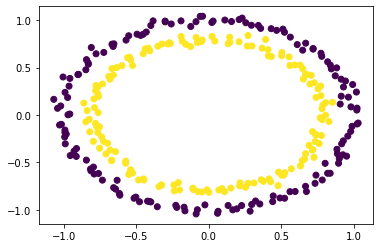

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.03) # Сгенерируем данные

plt.scatter(X[:, 0], X[:, 1], c = y)

In [8]:
clf = SVC(kernel='rbf') # Создаем экземпляр класса
clf.fit(X, y) # Обучаем
clf.score(X,y) # Оценим долю правильных ответов

1.0

In [9]:
clf = SVC(kernel='linear') # Создаем экземпляр класса
clf.fit(X, y) # Обучаем
clf.score(X,y) # Оценим долю правильных ответов

0.5066666666666667

#### Попробуйте сами!

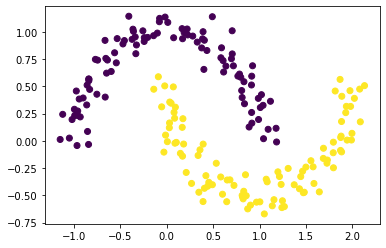

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], c = y)

Подробно про SVM можно прочитать в книге "Python и машинное обучение" (Рашка С.)